Análise exploratória de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv("../cafe/cafe.csv", encoding="UTF-8", index_col='ID')
dados.head()

,Unnamed: 0,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
ID,,,,,,,,,,,,,,,,,,,,,
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [9]:
dados.isna().sum().sort_values(ascending=False)

ICO Number               132
Variety                    6
Processing Method          5
Mill                       3
Farm Name                  2
Region                     2
Lot Number                 1
Altitude                   1
Producer                   1
Unnamed: 0                 0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category Two Defects       0
Category One Defects       0
Quakers                    0
Color                      0
Uniformity                 0
Expiration                 0
Certification Body         0
Certification Address      0
Clean Cup                  0
Flavor                     0
Balance                    0
Body                       0
Acidity                    0
Aftertaste                 0
Country of Origin          0
Aroma                      0
Status                     0
Owner                      0
Grading Date               0
Harvest Year  

In [21]:
dados.drop(['ICO Number'], axis=1, inplace=True)
dados.dropna(how='any', axis=0, inplace=True)

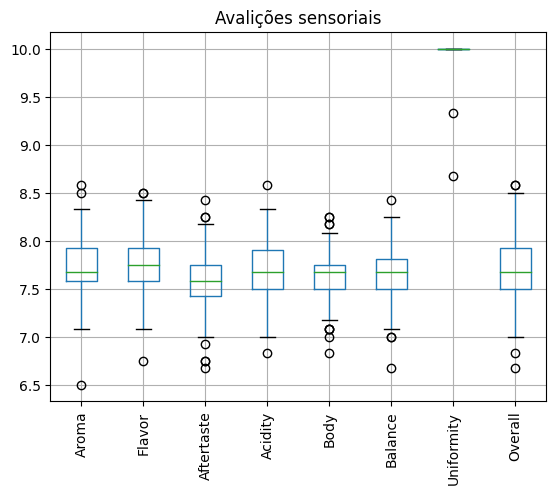

In [26]:
dados.boxplot(column=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Overall'])
plt.xticks(rotation=90)
plt.title('Avalições sensoriais')
plt.show()

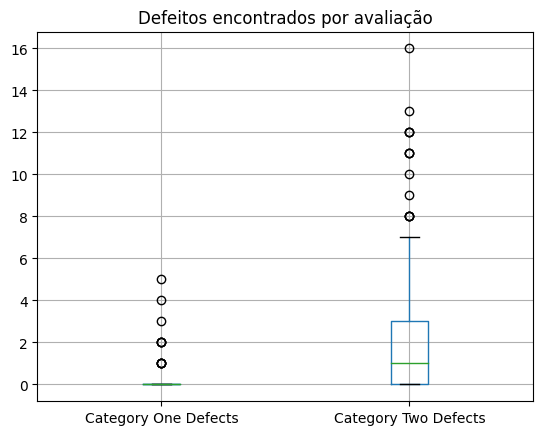

In [23]:
dados.boxplot(column=['Category One Defects', 'Category Two Defects'])
plt.title('Defeitos encontrados por avaliação')
plt.show()

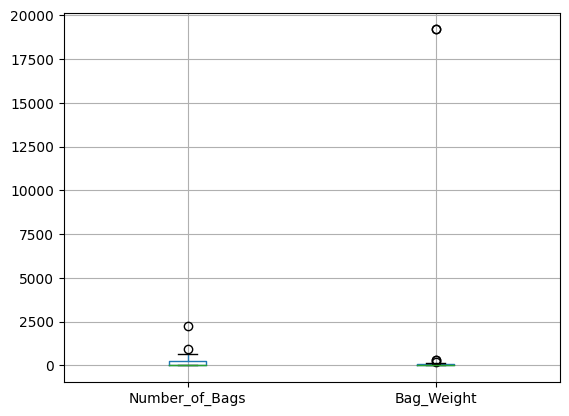

In [5]:
dados.boxplot(column=['Number_of_Bags', 'Bag_Weight'])
plt.show()

In [6]:
dados.dtypes.value_counts()

object     20
float64    13
int64       5
Name: count, dtype: int64

In [4]:
dados['Bag_Weight'] = dados['Bag_Weight'].str.replace(' kg', '')
dados['Bag_Weight'] = dados['Bag_Weight'].astype('int64')

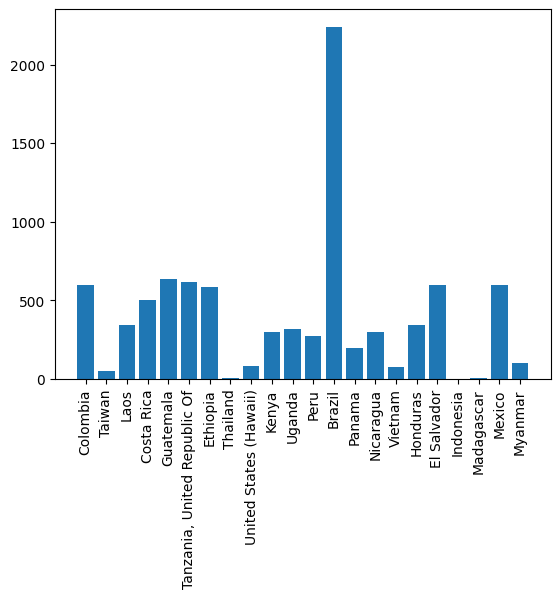

In [20]:
plt.bar(x = dados['Country_of_Origin'], height= dados['Number_of_Bags'])
plt.title('Sacos de café por país')
plt.xticks(rotation = 90)
plt.show()

Ínicio da modelagem de dados

In [27]:
dados['Acima_da_Media'] = (dados['Overall'] >= np.mean(dados['Overall']))*1

In [28]:
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,fbeta_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split

In [38]:
X = dados[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Category One Defects', 'Category Two Defects']]
Y = dados['Acima_da_Media']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=None)

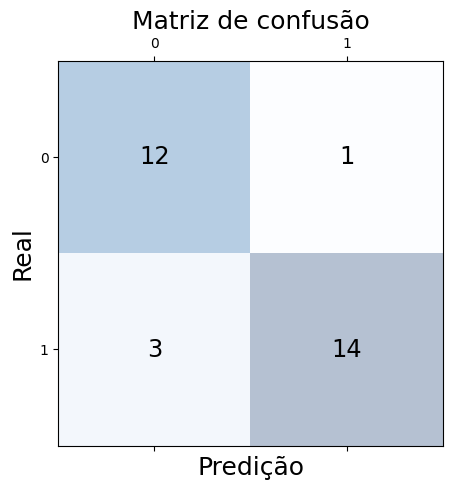

In [39]:
svc = SVC(kernel='linear', random_state=None)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predição', fontsize=18)
plt.ylabel('Real', fontsize=18)
plt.title('Matriz de confusão', fontsize=18)
plt.show()

In [65]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.92      0.71      0.80        17

    accuracy                           0.85        39
   macro avg       0.87      0.83      0.84        39
weighted avg       0.86      0.85      0.84        39



In [40]:
print(svc.intercept_.round(2), svc.coef_.round(2))

[-82.78] [[ 1.64  1.73  1.31  2.32  1.79  1.99  0.    0.   -0.01]]


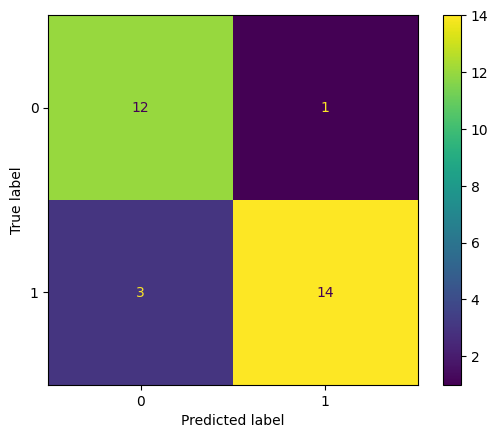

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

In [48]:
g = globals()

for country in dados['Country of Origin'].unique():
    vname = f'Y_pred_{country}'
    x = dados[dados['Country of Origin'] == f'{country}'][['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Category One Defects', 'Category Two Defects']]
    g[vname] = svc.predict(x)

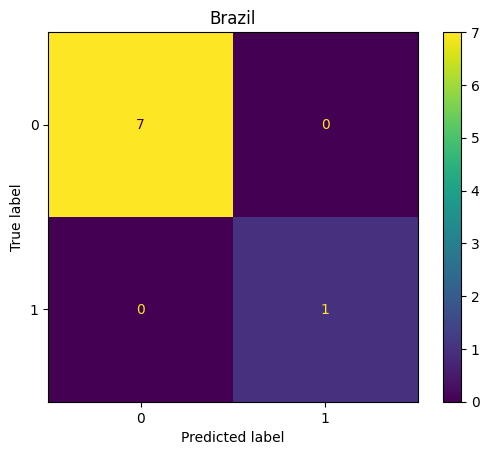

In [67]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Brazil']['Acima_da_Media'], Y_pred_Brazil, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Brazil')
plt.show()

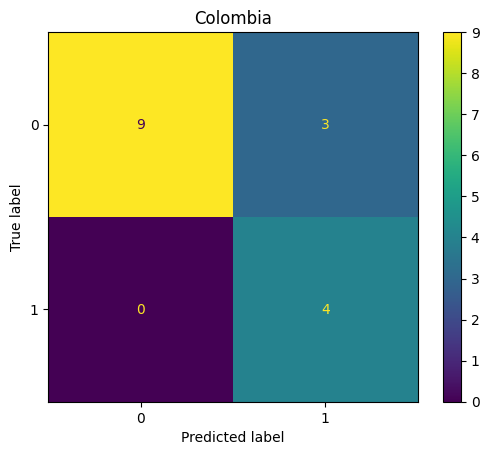

In [68]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Colombia']['Acima_da_Media'], Y_pred_Colombia, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Colombia')
plt.show()

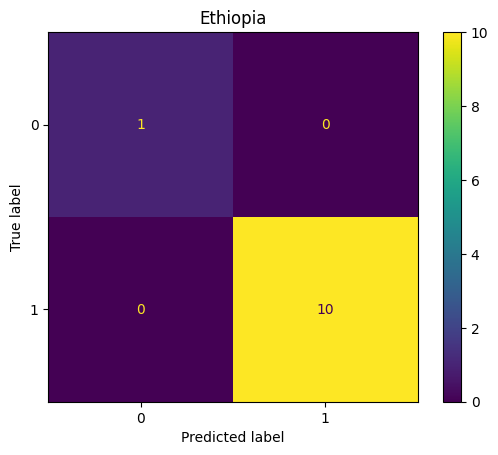

In [69]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Ethiopia']['Acima_da_Media'], Y_pred_Ethiopia, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Ethiopia')
plt.show()

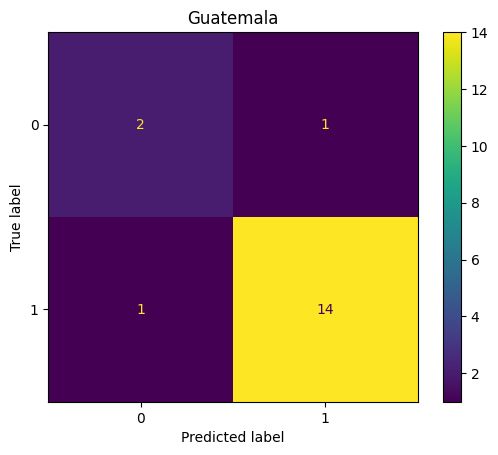

In [70]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Guatemala']['Acima_da_Media'], Y_pred_Guatemala, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Guatemala')
plt.show()

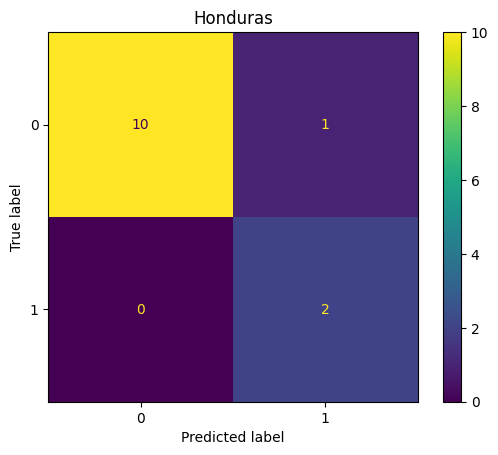

In [71]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Honduras']['Acima_da_Media'], Y_pred_Honduras, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Honduras')
plt.show()

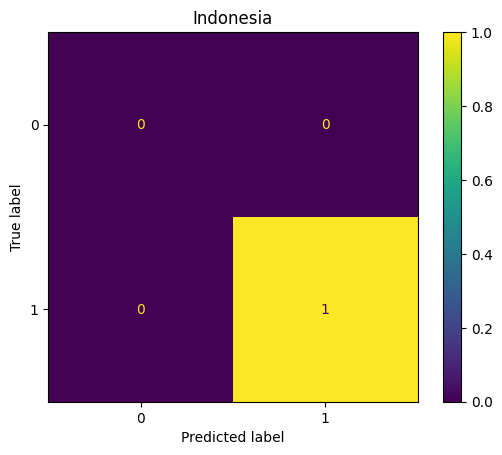

In [72]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Indonesia']['Acima_da_Media'], Y_pred_Indonesia, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Indonesia')
plt.show()

In [56]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'kenya']['Acima_da_Media'], Y_pred_Kenya, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [0, 2]

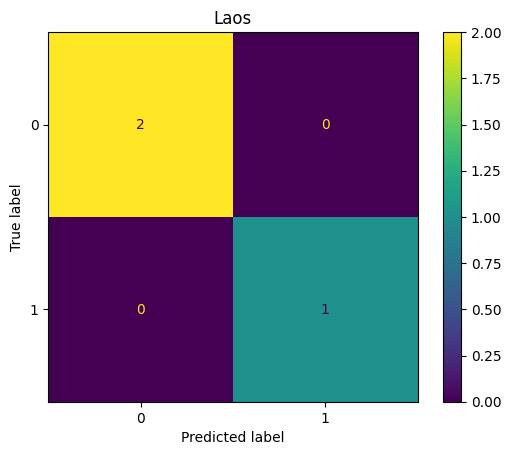

In [82]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Laos']['Acima_da_Media'], Y_pred_Laos, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Laos')
plt.show()

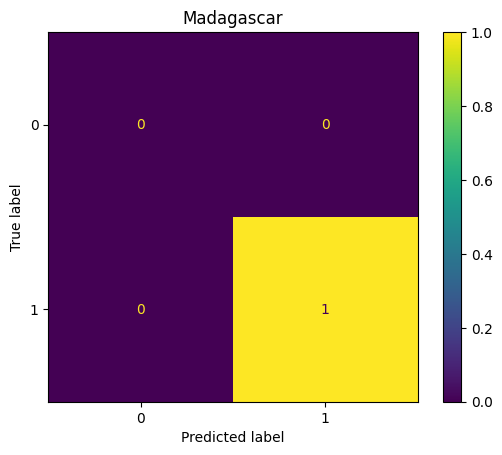

In [73]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Madagascar']['Acima_da_Media'], Y_pred_Madagascar, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Madagascar')
plt.show()

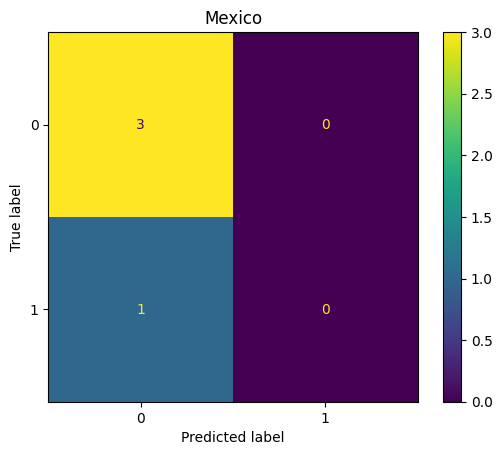

In [74]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Mexico']['Acima_da_Media'], Y_pred_Mexico, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Mexico')
plt.show()

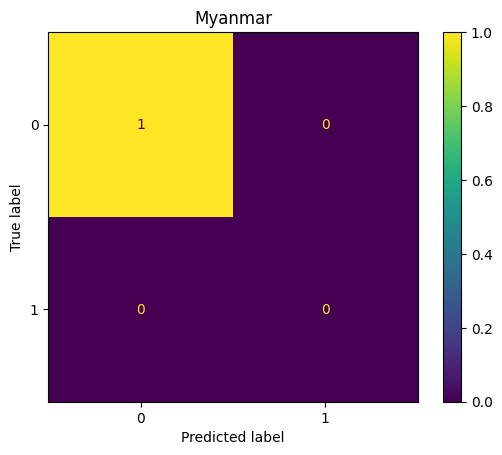

In [75]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Myanmar']['Acima_da_Media'], Y_pred_Myanmar, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Myanmar')
plt.show()

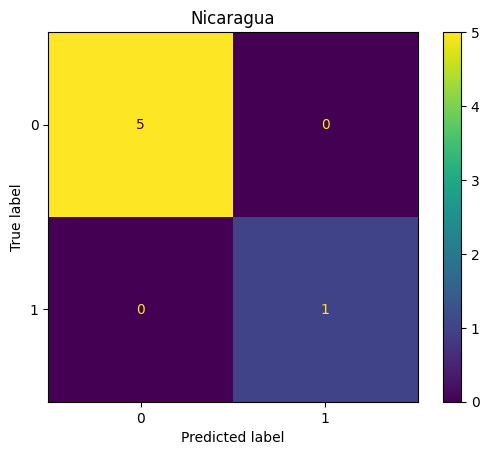

In [76]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Nicaragua']['Acima_da_Media'], Y_pred_Nicaragua, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Nicaragua')
plt.show()

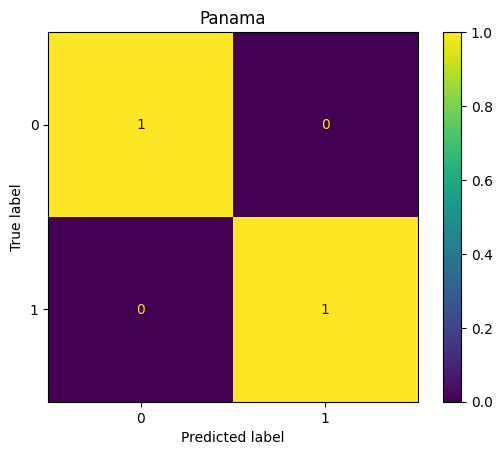

In [77]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Panama']['Acima_da_Media'], Y_pred_Panama, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Panama')
plt.show()

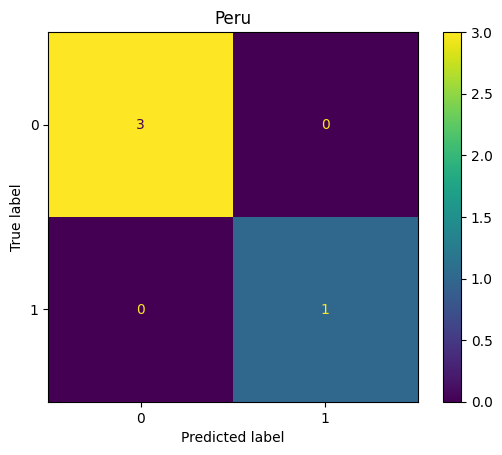

In [78]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Peru']['Acima_da_Media'], Y_pred_Peru, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Peru')
plt.show()

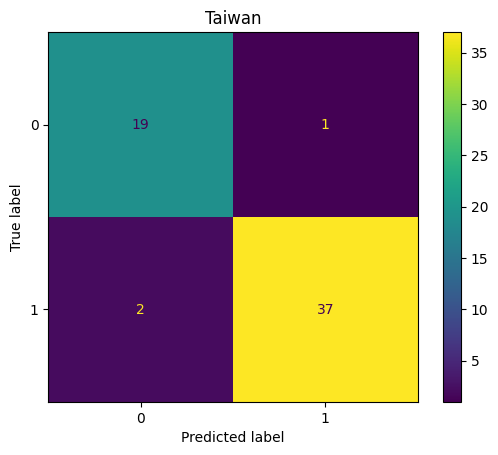

In [79]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Taiwan']['Acima_da_Media'], Y_pred_Taiwan, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Taiwan')
plt.show()

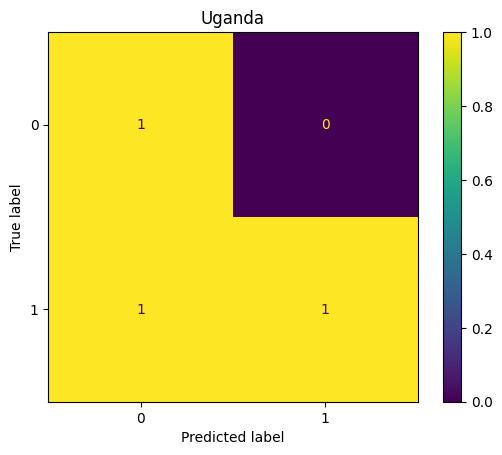

In [80]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Uganda']['Acima_da_Media'], Y_pred_Uganda, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Uganda')
plt.show()

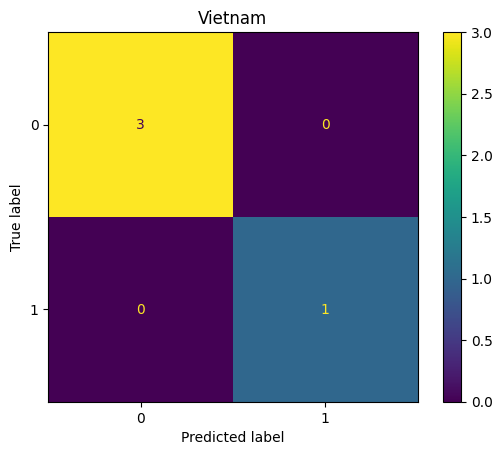

In [81]:
cm = confusion_matrix(dados[dados['Country of Origin'] == 'Vietnam']['Acima_da_Media'], Y_pred_Vietnam, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.title('Vietnam')
plt.show()

In [ ]:
Y_